In [1]:
import numpy as np
import pandas as pd
import geopandas
import neilpy
import lcp

geopandas.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [2]:
# Load data

# nodes must have a unique ID in the first column, and then longitudes and latitudes in columns 2 and 3.
# edges must have start and destination unique IDs that match those in nodes

nodes = pd.read_csv('data/nodes.csv',index_col=0)
edges = pd.read_csv('data/edges.csv')

E, meta = neilpy.imread('data/cusco_elevation.tif')
S = neilpy.slope(E,meta['cellsize'])

<AxesSubplot:>

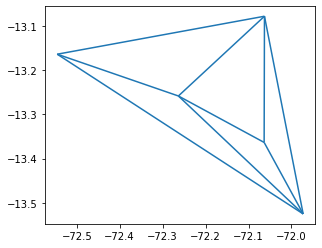

In [3]:
#%% DIRECT

gdf = lcp.direct_routes(nodes,edges)
gdf.to_file('out/direct.shp')

gdf.plot()

Creating surface network for tobler
Done creating surface network.
Calculating costs and routes.
Done calculating costs and routes.
Calculating costs and routes.
Done calculating costs and routes.
Calculating costs and routes.
Done calculating costs and routes.
Calculating costs and routes.
Done calculating costs and routes.
Creating surface network for rademaker
Done creating surface network.
Calculating costs and routes.
Done calculating costs and routes.
Calculating costs and routes.
Done calculating costs and routes.
Calculating costs and routes.
Done calculating costs and routes.
Calculating costs and routes.
Done calculating costs and routes.


<AxesSubplot:>

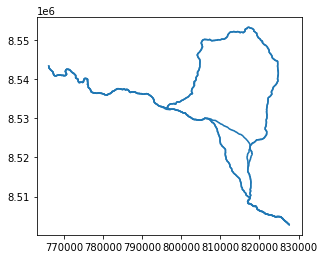

In [4]:
#%% AREAL SLOPE EXAMPLE

label = 'tobler'
C = lcp.cost_tobler_hiking_function(S)
gdf = lcp.get_areal_routes(nodes,edges,C,meta,label=label)
gdf.to_file('out/' + label + '.shp')
gdf.to_file('out/' + label + '.kml',driver='KML')

label = 'rademaker'
C = lcp.cost_rademaker(S)
gdf = lcp.get_areal_routes(nodes,edges,C,meta,label=label)
gdf.to_file('out/' + label + '.shp')
gdf.to_file('out/' + label + '.kml',driver='KML')

gdf.plot()

<AxesSubplot:>

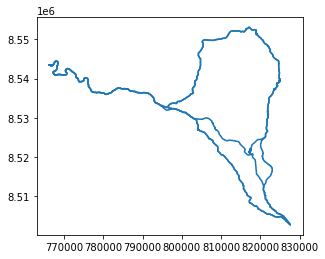

In [5]:
#%% LINEAR SLOPE EXAMPLE

label = 'pingel_linear_9.25'
scale_factor = 9.25

df = lcp.create_raster_network(E)
df['slope'] = np.abs(df['source_value'] - df['target_value']) / (meta['cellsize']*df['distance'])
df['slope'] = np.rad2deg(np.arctan(df['slope']))
df['slope'] = lcp.cost_pingel_exponential(df['slope'],scale_factor)
df['weight'] = df['distance'] * df['slope']

gdf = lcp.get_linear_routes(nodes, edges, df, meta, label=label)
gdf.to_file('out/' + label + '.shp')
gdf.to_file('out/' + label + '.kml',driver='KML')

gdf.plot()